<a href="https://colab.research.google.com/github/oisincam/Neural-Networks/blob/main/NN_CatsVDogsipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

First, mount your google drive. The photos can then be found in the path /content/drive/Othercomputers/My laptop/train

In [ ]:
# Organize data into train, valid, test dirs
os.chdir('/content/drive/Othercomputers/My laptop/cats-vs-dogs')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

    for i in random.sample(glob.glob('cat*'), 500):
        shutil.move(i, 'train/cat')      
    for i in random.sample(glob.glob('dog*'), 500):
        shutil.move(i, 'train/dog')
    for i in random.sample(glob.glob('cat*'), 100):
        shutil.move(i, 'valid/cat')        
    for i in random.sample(glob.glob('dog*'), 100):
        shutil.move(i, 'valid/dog')
    for i in random.sample(glob.glob('cat*'), 50):
        shutil.move(i, 'test/cat')      
    for i in random.sample(glob.glob('dog*'), 50):
        shutil.move(i, 'test/dog')

os.chdir('../../')

In [ ]:
test_path = '/content/drive/Othercomputers/My laptop/cats-vs-dogs/test'
train_path = '/content/drive/Othercomputers/My laptop/cats-vs-dogs/train'
valid_path = '/content/drive/Othercomputers/My laptop/cats-vs-dogs/valid'

In [ ]:
# now we creat batches of size 10, and process the images a little. 
#what we do is create a DirectoryIterator, which stores batches of size 10 configured to 224x224 size
# this is an infinitely repeating dataset; if we keep hitting next batch, we get a next batch. 


In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
train_batches

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
# this is what zip does
a = ("John", "Charles", "Mike")
b = ("Jenny", "Christy", "Monica", "Vicky")
x = zip(a,b)
for name in x:
  print(name)

('John', 'Jenny')
('Charles', 'Christy')
('Mike', 'Monica')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

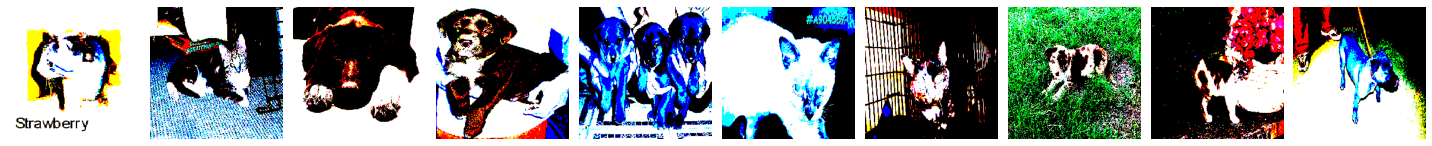

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [ ]:
imgs, labels  =next(train_batches)
plotImages(imgs)
print(labels)

In [ ]:
# model time 
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# you could instead have a final dense layer with one node, the sigmoid activation, and use binary loss

In [ ]:
model.fit(
    x = train_batches,
    steps_per_epoch = len(train_batches),
    validation_data = valid_batches,
    validation_steps = len(valid_batches),
    epochs = 10,
    verbose = 2,
)

Epoch 1/10
100/100 - 79s - loss: 26.2916 - accuracy: 0.5480 - val_loss: 5.0782 - val_accuracy: 0.5850 - 79s/epoch - 786ms/step
Epoch 2/10
100/100 - 77s - loss: 1.9766 - accuracy: 0.7740 - val_loss: 3.8847 - val_accuracy: 0.6150 - 77s/epoch - 767ms/step
Epoch 3/10
100/100 - 78s - loss: 0.9719 - accuracy: 0.8350 - val_loss: 4.1257 - val_accuracy: 0.5800 - 78s/epoch - 781ms/step
Epoch 4/10
100/100 - 76s - loss: 0.2883 - accuracy: 0.9360 - val_loss: 2.9111 - val_accuracy: 0.6050 - 76s/epoch - 759ms/step
Epoch 5/10
100/100 - 76s - loss: 0.1738 - accuracy: 0.9560 - val_loss: 2.7024 - val_accuracy: 0.6450 - 76s/epoch - 761ms/step
Epoch 6/10
100/100 - 78s - loss: 0.0970 - accuracy: 0.9800 - val_loss: 2.6217 - val_accuracy: 0.6650 - 78s/epoch - 781ms/step
Epoch 7/10
100/100 - 76s - loss: 0.0220 - accuracy: 0.9910 - val_loss: 2.7544 - val_accuracy: 0.6200 - 76s/epoch - 764ms/step
Epoch 8/10
100/100 - 76s - loss: 0.0164 - accuracy: 0.9940 - val_loss: 2.6207 - val_accuracy: 0.6600 - 76s/epoch - 76

In [ ]:
# looks like our model is overfitting, but we'll use it on the test data anyway

In [ ]:
predictions = model.predict(x = test_batches, steps=len(test_batches),verbose=0)

In [ ]:
np.round(predictions)

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes,y_pred = np.argmax(predictions,axis=-1))

In [ ]:
cm

array([[33, 17],
       [16, 34]])

In [ ]:
# this code for plotting the confusion matrix is just copy pasted from the site
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization
[[33 17]
 [16 34]]


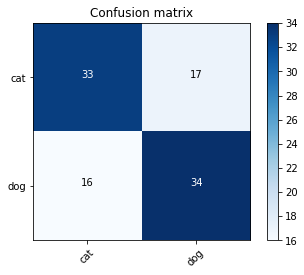

In [ ]:
plot_confusion_matrix(cm, classes = ['cat','dog'])

# Fine Tuning

In [ ]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553476096/553467096 [==============================] - 5s 0us/step


In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
for layer in model.layers:
    layer.trainable = False
model.add(Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

Epoch 1/5
100/100 - 650s - loss: 0.3320 - accuracy: 0.8600 - val_loss: 0.1673 - val_accuracy: 0.9300 - 650s/epoch - 7s/step
Epoch 2/5
100/100 - 625s - loss: 0.0978 - accuracy: 0.9590 - val_loss: 0.1025 - val_accuracy: 0.9650 - 625s/epoch - 6s/step
Epoch 3/5
100/100 - 627s - loss: 0.0625 - accuracy: 0.9770 - val_loss: 0.0922 - val_accuracy: 0.9650 - 627s/epoch - 6s/step
Epoch 4/5
100/100 - 646s - loss: 0.0442 - accuracy: 0.9890 - val_loss: 0.0796 - val_accuracy: 0.9750 - 646s/epoch - 6s/step
Epoch 5/5
100/100 - 660s - loss: 0.0318 - accuracy: 0.9910 - val_loss: 0.0793 - val_accuracy: 0.9800 - 660s/epoch - 7s/step


In [ ]:
predictions = model.predict(x = test_batches, steps=len(test_batches),verbose=0)

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes,y_pred = np.argmax(predictions,axis=-1))

In [ ]:
cm

array([[50,  0],
       [ 1, 49]])

Confusion matrix, without normalization
[[50  0]
 [ 1 49]]


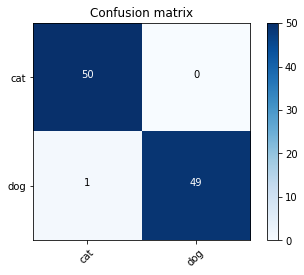

In [ ]:
plot_confusion_matrix(cm, classes = ['cat','dog'])